In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv(r'D:\STUDY\mnist_train.csv')

In [23]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [27]:
arr = data.isna().sum()

In [32]:
for i in arr:
    if arr[i] != 0:
        print(i)
        
print("These are the columns that contains Null values.")
print("{IF YOU SEE NO INDEX, THAT MEANS THERE ARE NO COLUMNS THAT HAVE NULL VALUES}")

These are the columns that contains Null values.
{IF YOU SEE NO INDEX, THAT MEANS THERE ARE NO COLUMNS THAT HAVE NULL VALUES}


In [33]:
data = np.array(data)
m, n = data.shape  # m = rows, n = columns
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:100].T  # transposing the matrix
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[100:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train

array([6, 1, 5, ..., 1, 7, 5], dtype=int64)

In [39]:
def init_params():
    W1 = np.random.randn(10, 784)
    b1 = np.random.randn(10, 1)
    W2 = np.random.randn(10, 10)
    b2 = np.random.randn(10, 1)
    return W1, b1, W2, b2

In [40]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [41]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [42]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [43]:
def ReLU_deriv(Z):
    return Z > 0

In [44]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [45]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [46]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [47]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [48]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [49]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [51]:
n_jobs=-1
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 2500)

Iteration:  0
[4 4 7 ... 4 4 7] [6 1 5 ... 1 7 5]
0.09227045075125209
Iteration:  10
[5 5 1 ... 5 4 5] [6 1 5 ... 1 7 5]
0.13225375626043406
Iteration:  20
[5 5 5 ... 5 7 5] [6 1 5 ... 1 7 5]
0.13008347245409016
Iteration:  30
[5 5 5 ... 5 5 5] [6 1 5 ... 1 7 5]
0.13053422370617696
Iteration:  40
[5 5 5 ... 5 5 5] [6 1 5 ... 1 7 5]
0.13253756260434058
Iteration:  50
[5 5 5 ... 5 5 5] [6 1 5 ... 1 7 5]
0.13606010016694492
Iteration:  60
[5 5 5 ... 5 5 5] [6 1 5 ... 1 7 5]
0.14086811352253756
Iteration:  70
[5 5 6 ... 5 5 5] [6 1 5 ... 1 7 5]
0.14818030050083472
Iteration:  80
[5 5 6 ... 5 5 5] [6 1 5 ... 1 7 5]
0.1563939899833055
Iteration:  90
[5 5 6 ... 5 5 5] [6 1 5 ... 1 7 5]
0.16737896494156929
Iteration:  100
[5 5 6 ... 5 5 5] [6 1 5 ... 1 7 5]
0.17846410684474123
Iteration:  110
[5 5 6 ... 5 5 5] [6 1 5 ... 1 7 5]
0.1908347245409015
Iteration:  120
[5 5 6 ... 1 5 5] [6 1 5 ... 1 7 5]
0.2021035058430718
Iteration:  130
[5 5 6 ... 1 7 5] [6 1 5 ... 1 7 5]
0.2133889816360601
Iterati

Iteration:  1150
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.569966611018364
Iteration:  1160
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5713522537562604
Iteration:  1170
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5729215358931553
Iteration:  1180
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5748247078464107
Iteration:  1190
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5762771285475793
Iteration:  1200
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5775459098497496
Iteration:  1210
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5787813021702838
Iteration:  1220
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5803171953255426
Iteration:  1230
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.581669449081803
Iteration:  1240
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5830383973288815
Iteration:  1250
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5843906510851419
Iteration:  1260
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5855926544240401
Iteration:  1270
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.5868447412353923
Iteration:  1280
[5 1 8 ... 1 7 9] [6 1 5 ... 1 7 5]
0.58814691151

Iteration:  2290
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6547913188647746
Iteration:  2300
[6 1 2 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6571452420701168
Iteration:  2310
[5 1 2 ... 1 7 5] [6 1 5 ... 1 7 5]
0.642754590984975
Iteration:  2320
[5 1 2 ... 1 7 5] [6 1 5 ... 1 7 5]
0.660534223706177
Iteration:  2330
[5 1 5 ... 1 7 5] [6 1 5 ... 1 7 5]
0.6609515859766277
Iteration:  2340
[5 1 5 ... 1 7 5] [6 1 5 ... 1 7 5]
0.6604841402337228
Iteration:  2350
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6562103505843072
Iteration:  2360
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6299666110183639
Iteration:  2370
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6585976627712855
Iteration:  2380
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6587312186978297
Iteration:  2390
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6571285475792988
Iteration:  2400
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6409849749582638
Iteration:  2410
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.6594991652754592
Iteration:  2420
[6 1 5 ... 1 7 3] [6 1 5 ... 1 7 5]
0.65851419031

In [52]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

Prediction:  [5]
Label:  6


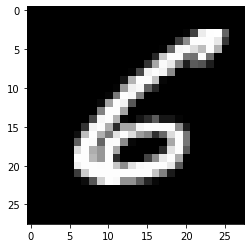

Prediction:  [1]
Label:  1


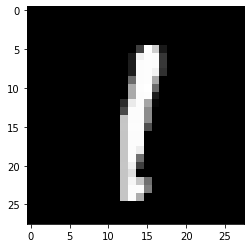

Prediction:  [5]
Label:  5


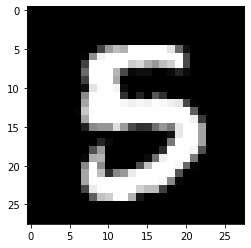

Prediction:  [3]
Label:  3


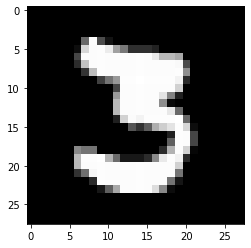

[5 0 7 6 9 7 6 5 7 9 9 0 1 6 2 3 2 6 2 7 1 9 6 4 5 3 9 3 2 9 7 1 6 5 3 1 6
 9 2 3 2 6 5 5 1 1 6 4 6 9 4 2 5 6 1 6 4 0 6 2 7 7 9 0 4 0 0 4 4 5 2 3 5 3
 2 9 2 1 1 2 5 9 0 6 1 7 6 2 7 1 1 2 3 7 4 2 1 2 9 7] [7 0 7 8 1 0 6 0 7 5 9 0 1 0 0 3 2 6 2 7 1 3 6 4 9 3 9 9 2 9 7 1 6 0 3 1 6
 9 3 3 5 6 5 5 1 2 6 4 6 9 5 5 8 6 1 6 4 0 6 6 7 7 8 0 4 0 0 4 4 8 2 2 3 3
 3 9 2 8 6 5 4 9 0 6 1 7 6 1 7 1 1 3 3 5 4 2 8 2 7 7]
0.67


In [53]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(dev_predictions, Y_dev))